In [1]:
# import matplotlib.cm as cm
# from scipy.integrate import RK45,solve_ivp

# import matplotlib.animation as animation

# #sp.init_printing()

# from matplotlib import rc
# rc('animation', html='jshtml', embed_limit=500)
# #animation.

In [1]:
#import matplotlib.pyplot as plt
import curvedpy
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [427]:
# import time
# import sympy as sp
# import numpy as np
# from scipy.integrate import solve_ivp

# class SchwarzschildGeodesic:
    
#     def __init__(self, time_like = False, r_s_value = 1):
#         self.r_s_value = r_s_value
#         self.time_like = time_like
        
#         # Define symbolic variables
#         self.t, self.x, self.y, self.z, self.r_s = sp.symbols('t x y z r_s')
        
#         # Radial distance to BlackHole location
#         self.R = sp.sqrt(self.x**2 + self.y**2 + self.z**2)
        
#         # The metric
#         self.g = sp.Matrix([\
#             [-(1-self.r_s/(4*self.R))**2 / (1+self.r_s/(4*self.R))**2, 0, 0, 0],\
#             [0, (1+self.r_s/(4*self.R))**4, 0, 0], \
#             [0, 0, (1+self.r_s/(4*self.R))**4, 0], \
#             [0, 0, 0, (1+self.r_s/(4*self.R))**4], \
#               ])
        
#         # Connection Symbols
#         self.gam_t = sp.Matrix([[self.gamma_func(0,mu, nu).simplify() for mu in [0,1,2,3]] for nu in [0,1,2,3]])
#         self.gam_x = sp.Matrix([[self.gamma_func(1,mu, nu).simplify() for mu in [0,1,2,3]] for nu in [0,1,2,3]])
#         self.gam_y = sp.Matrix([[self.gamma_func(2,mu, nu).simplify() for mu in [0,1,2,3]] for nu in [0,1,2,3]])
#         self.gam_z = sp.Matrix([[self.gamma_func(3,mu, nu).simplify() for mu in [0,1,2,3]] for nu in [0,1,2,3]])
        
#         # Building up the geodesic equation: 
#         # Derivatives: k_beta = d x^beta / d lambda
#         self.k_t, self.k_x, self.k_y, self.k_z = sp.symbols('k_t k_x k_y k_z', real=True)
#         self.k = [self.k_t, self.k_x, self.k_y, self.k_z]
    
#         # Second derivatives: d k_beta = d^2 x^beta / d lambda^2
#         self.dk_t = sum([- self.gam_t[nu, mu]*self.k[mu]*self.k[nu] for mu in [0,1,2,3] for nu in [0,1,2,3]])
#         self.dk_x = sum([- self.gam_x[nu, mu]*self.k[mu]*self.k[nu] for mu in [0,1,2,3] for nu in [0,1,2,3]])
#         self.dk_y = sum([- self.gam_y[nu, mu]*self.k[mu]*self.k[nu] for mu in [0,1,2,3] for nu in [0,1,2,3]])
#         self.dk_z = sum([- self.gam_z[nu, mu]*self.k[mu]*self.k[nu] for mu in [0,1,2,3] for nu in [0,1,2,3]])

#         # Norm of k
#         # the norm of k determines if you have a massive particle (-1), a mass-less photon (0) 
#         # or a space-like curve (1)
#         self.norm_k = self.g[0, 0]*self.k_t**2 + self.g[1,1]*self.k_x**2 + \
#                         self.g[2,2]*self.k_y**2 + self.g[3,3]*self.k_z**2
        
#         # Now we calculate k_t using the norm. This eliminates one of the differential equations.
#         # time_like = True: calculates a geodesic for a massive particle
#         # time_like = False: calculates a geodesic for a photon
#         if (self.time_like):
#             self.k_t_from_norm = sp.solve(self.norm_k+1, self.k_t)[1]#.simplify()
#         else:
#             self.k_t_from_norm = sp.solve(self.norm_k, self.k_t)[1]#.simplify()

#         # Lambdify versions
#         self.dk_x_lamb = sp.lambdify([self.k_x, self.x, self.k_y, self.y, self.k_z, self.z, \
#                                       self.k_t, self.t, self.r_s], \
#                                      self.dk_x, "numpy")
#         self.dk_y_lamb = sp.lambdify([self.k_x, self.x, self.k_y, self.y, self.k_z, self.z, \
#                                       self.k_t, self.t, self.r_s], \
#                                      self.dk_y, "numpy")
#         self.dk_z_lamb = sp.lambdify([self.k_x, self.x, self.k_y, self.y, self.k_z, self.z, \
#                                       self.k_t, self.t, self.r_s], \
#                                      self.dk_z, "numpy")
#         self.k_t_from_norm_lamb = sp.lambdify([self.k_x, self.x, self.k_y, self.y, self.k_z, self.z, \
#                                                self.r_s], self.k_t_from_norm, "numpy")

#     # Grid is not needed :)
#     def calc_grid(self, \
#                   affine_param_start = 0, affine_param_end = 50, affine_param_nr_points = 100, \
#                   x0 = -10, y0_start = 0, y0_end = 30.1, z0_start = 0, z0_end = 30.1, \
#                   y_spacing = 1.0, z_spacing = 1.0, \
#                   k_x_0 = 1., k_y_0 = 0., k_z_0 = 0.):
#         #grid_x0 = np.array([-10])
#         #x0 = -10.
#         grid_y0 = np.arange(y0_start, y0_end, y_spacing)
#         grid_z0 = np.arange(z0_start, z0_end, z_spacing)

#         print("Expected compute: ", len(grid_y0)*len(grid_z0)*0.003, "sec, for ", \
#               len(grid_y0)*len(grid_z0), " models")
#         print("x0: ", x0)
#         print("y0 range: ", min(grid_y0), max(grid_y0))
#         print("z0 range: ", min(grid_z0), max(grid_z0))
        
#         start = time.time()
#         results = [[{"x0": x0, "y0": y0, "z0": z0, "result":\
#                      self.calc_trajectory(\
#                         k_x_0 = k_x_0, k_y_0 = k_y_0, k_z_0 = k_z_0, \
#                         x0 = x0, y0 = y0, z0 = z0, \
#                         curve_start = affine_param_start, \
#                         curve_end = affine_param_end, \
#                         nr_points_curve = affine_param_nr_points, \
#                         verbose = False \
#                        )\
#                     } for z0 in grid_z0] for y0 in grid_y0]
#         end = time.time()
#         print(end-start)
        
#         return results

#     def calc_1d_grid(self, \
#                   affine_param_start = 0, affine_param_end = 50, affine_param_nr_points = 100, \
#                   x0 = -10, y0_start = 0, y0_end = 30.1, z0 = 0, \
#                   y_spacing = 1.0, \
#                   k_x_0 = 1., k_y_0 = 0., k_z_0 = 0.):

#         grid_y0 = np.arange(y0_start, y0_end, y_spacing)

#         print("Expected compute: ", len(grid_y0)*0.003, "sec, for ", \
#               len(grid_y0), " models")
#         print("x0: ", x0)
#         print("y0 range: ", min(grid_y0), max(grid_y0))
#         print("z0: ", z0)
        
#         start = time.time()
#         results = [{"x0": x0, "y0": y0, "z0": z0, "result":\
#                      self.calc_trajectory(\
#                         k_x_0 = k_x_0, k_y_0 = k_y_0, k_z_0 = k_z_0, \
#                         x0 = x0, y0 = y0, z0 = z0, \
#                         curve_start = affine_param_start, \
#                         curve_end = affine_param_end, \
#                         nr_points_curve = affine_param_nr_points, \
#                         verbose = False \
#                        )\
#                     } for y0 in grid_y0]
#         end = time.time()
#         print(end-start)
        
#         return results
    
#     def calc_trajectory(self, \
#                         k_x_0 = 1., k_y_0 = 0., k_z_0 = 0., \
#                         x0 = -10.0, y0 = 5.0, z0 = 5.0, \
#                         curve_start = 0, \
#                         curve_end = 50, \
#                         nr_points_curve = 50, \
#                         verbose = True \
#                        ):
#         # Step function needed for solve_ivp
#         def step(lamb, new):
#             new_k_x, new_x, new_k_y, new_y, new_k_z, new_z = new

#             new_k_t = self.k_t_from_norm_lamb(*new, self.r_s_value)
#             new_dk_x = self.dk_x_lamb(*new, new_k_t, t = 0, r_s = self.r_s_value)
#             dx = new_k_x
#             new_dk_y = self.dk_y_lamb(*new, new_k_t, t = 0, r_s = self.r_s_value)
#             dy = new_k_y
#             new_dk_z = self.dk_z_lamb(*new, new_k_t, t = 0, r_s = self.r_s_value)
#             dz = new_k_z

#             return( new_dk_x, dx, new_dk_y, dy, new_dk_z, dz)

#         def hit_blackhole(t, y): 
#             k_x, x, k_y, y, k_z, z = y
#             return x**2 + y**2 + z**2 - self.r_s_value**2
#         hit_blackhole.terminal = True
#         #hit_blackhole.direction = -1
        
#         def hit_background(t, y):
#             k_x, x, k_y, y, k_z, z = y
#             return x-15. # !!!! DEZE WAARDE UITPROGRAMMEREN
#         hit_background.terminal = True

#         values_0 = [ k_x_0, x0, k_y_0, y0, k_z_0, z0 ]
#         t_pts = np.linspace(curve_start, curve_end, nr_points_curve)

#         start = time.time()
#         result = solve_ivp(step, (curve_start, curve_end), values_0, t_eval=t_pts, \
#                            events=[hit_blackhole, hit_background])
#         end = time.time()
#         if verbose: print("New: ", result.message, end-start, "sec")
            
#         result.update({"hit_background": len(result.t_events[1])>0})
#         result.update({"hit_blackhole": len(result.t_events[0])>0})
#         result.update({"hit_nothing": len(result.t_events[0]) == 0 and len(result.t_events[1]) == 0})

#         return result
     
#     # Connection Symbols
#     def gamma_func(self, sigma, mu, nu):
#         coord_symbols = [self.t, self.x, self.y, self.z]
#         g_sigma_mu_nu = 0
#         for rho in [0,1,2,3]:
#             if self.g[sigma, rho] != 0:
#                 g_sigma_mu_nu += 1/2 * 1/self.g[sigma, rho] * (\
#                                 self.g[nu, rho].diff(coord_symbols[mu]) + \
#                                 self.g[rho, mu].diff(coord_symbols[nu]) - \
#                                 self.g[mu, nu].diff(coord_symbols[rho]) )
#             else:
#                 g_sigma_mu_nu += 0
#         return g_sigma_mu_nu

#     def ray_trace(self, direction, loc_bh, loc_hit, R_obj_blender=1):
#         # R_obj_blender: the size of the object representing the black hole in Blender
#         R_influence = self.r_s_value*10 # This is the dinemsion sphere of influence of the BH
        
#         if R_obj_blender != 1: print("R_obj_blender: THIS IS NOT IMPLEMENTED")
            
#         direction = direction/np.linalg.norm(direction)
#         print("loc_hit", loc_hit)
#         loc_hit = np.array(loc_hit) - np.array(loc_bh)
#         print("loc_hit", loc_hit)
#         loc_hit = loc_hit * R_influence # THIS NEEDS TO CHANGE IF R_obj_blender IS IMPLEMENTED
#         print("loc_hit", loc_hit)

#         if not np.linalg.norm(loc_hit) == 10.: print("Strange hit location not on sphere: norm(hit)", \
#                                                   np.linalg.norm(loc_hit))
        
#         res = self.calc_trajectory(\
#                         k_x_0 = direction[0], k_y_0 = direction[1], k_z_0 = direction[2], \
#                         x0 = loc_hit[0], y0 = loc_hit[1], z0 = loc_hit[2], \
#                             )
#         k_x, x, k_y, y, k_z, z = res.y
        
      
#         list_i = []
#         for i in range(len(x)):
#             if x[i]**2 + y[i]**2 + z[i]**2 < R_influence**2:
#                 #print("reached it")
#                 #print(x[i]**2 + y[i]**2 + z[i]**2, R_influence**2, i, len(x))
#                 list_i.append(i)

#         if len(list_i) == 0:
#             return x, y, z, None, None
#         else:
#             x = x[list_i]
#             y = y[list_i]
#             z = z[list_i]
#             k_x = k_x[list_i]
#             k_y = k_y[list_i]
#             k_z = k_z[list_i]
            
#             x, y, z = x/R_influence + loc_bh[0], y/R_influence + loc_bh[1], z/R_influence + loc_bh[2]
#             end_loc, end_dir = np.array([x[-1], y[-1], z[-1]]), np.array([k_x[-1], k_y[-1], k_z[-1]]) 

#             return x, y, z, end_loc, end_dir
        

In [2]:
SW = curvedpy.SchwarzschildGeodesic()

toeka


In [39]:
direction = np.array([-1, -1, 0])
direction_norm = direction/np.linalg.norm(direction)
loc_bh = np.array([1,2,3])
loc_hit_rel_to_bh = np.array([1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3)])
#loc_hit_rel_to_bh = np.array([1, 1, 0])
#loc_hit_rel_to_bh = loc_hit_rel_to_bh/np.linalg.norm(loc_hit_rel_to_bh)

loc_hit = loc_hit_rel_to_bh +loc_bh

x, y, z, end_loc, end_dir = SW.ray_trace(direction, loc_bh, loc_hit)

print(end_loc, end_dir)

print(z)
#imp_p, projected_distance, track = SW.SSG(direction, loc_bh, loc_hit)

#np.dot(imp_p, direction), projected_distance, track




loc_hit [1.57735027 2.57735027 3.57735027]
loc_hit [0.57735027 0.57735027 0.57735027]
loc_hit [5.77350269 5.77350269 5.77350269]
New:  The solver successfully reached the end of the integration interval. 0.010885000228881836 sec
[0.37584876 1.37584876 3.29120893] [-0.66501135 -0.66501135 -0.34182832]
[3.57735027 3.5770278  3.575961   3.57391008 3.5705542  3.56551948
 3.55837898 3.54865274 3.53579212 3.5194045  3.49964773 3.4767635
 3.4510244  3.42273389 3.39222637 3.3598671  3.32605226 3.29120893]


[1.57735027 2.57735027 3.57735027] [1 2 3] 1.5773502691896257 2.5773502691896257 3.5773502691896257
[2.57735027 2.50519302 2.43303425 2.36087235 2.28871501 2.21658878
 2.1445391  2.07263027 2.0009568  1.92967455 1.85884631 1.78850121
 1.71864967 1.64928336 1.58037525 1.51187957 1.44373181 1.37584876]


(-5.0, 5.0)

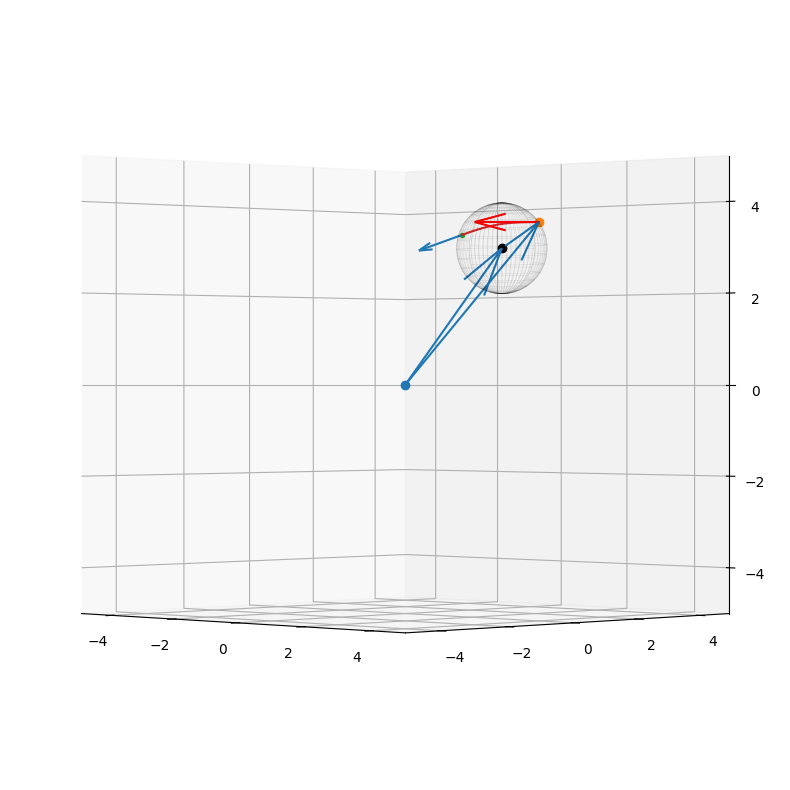

In [41]:
plt.close()
#frames = len(result_list[0].y[0])
#print(frames)

# We add a subplot to the figure which we tell to use the 3d projection 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=0, azim=-45, roll=0)
ax.set_aspect("equal") 


# Using numpy we make a grid that we use to plot the wireframe
theta_w, phi_w =  np.mgrid[0:2*np.pi : 60j ,0:np.pi : 60j]

# We set the radius of the wireframe sphere to 1 and calculate
# the cartesian coordinates
# r_w = 1
x_w = loc_bh[0] + np.sin(theta_w) * np.cos(phi_w) #func_x(r_w, theta_w, phi_w)
y_w = loc_bh[1] + np.sin(theta_w) * np.sin(phi_w) #func_y(r_w, theta_w, phi_w)
z_w = loc_bh[2] + np.cos(theta_w) #func_z(r_w, theta_w, phi_w)

# # We plot the wireframe
ax.plot_wireframe(x_w,y_w,z_w, colors= [0,0,0,0.08], linewidths=[0.5])


print(loc_hit, loc_bh, x[0], y[0], z[0])

ax.plot(0, 0, 0, "o")

ax.plot(*loc_bh, "ko")
ax.quiver(0, 0, 0, *loc_bh)
ax.plot(*loc_hit, "o")
ax.quiver(0, 0, 0, *loc_hit, arrow_length_ratio = 0.2)

# temp_dir = direction_norm * projected_distance
ax.quiver(*loc_hit, *direction, color="r", arrow_length_ratio = 0.5)

if len(end_loc) > 0:
    ax.plot(*end_loc, ".-")
    ax.quiver(*end_loc, *end_dir)

print(y)
ax.plot(x, y, z, "-")

limit = 5
plt.xlim(-limit, limit)
plt.ylim(-limit, limit)
ax.set_zlim(-limit, limit)

In [106]:
import numpy as np
np.array([1,2])-np.array([1,2])

array([0, 0])

In [29]:
res_1d = SW.calc_1d_grid(y_spacing=0.1)
res_1d[0]

Expected compute:  0.903 sec, for  301  models
x0:  -10
y0 range:  0.0 30.0
z0:  0
1.0393409729003906


{'x0': -10,
 'y0': 0.0,
 'z0': 0,
 'result':  hit_background: True
   hit_blackhole: False
     hit_nothing: False
         message: 'A termination event occurred.'
            nfev: 26
            njev: 0
             nlu: 0
             sol: None
          status: 1
         success: True
               t: array([ 0.        ,  0.50505051,  1.01010101,  1.51515152,  2.02020202,
         2.52525253,  3.03030303,  3.53535354,  4.04040404,  4.54545455,
         5.05050505,  5.55555556,  6.06060606,  6.56565657,  7.07070707,
         7.57575758,  8.08080808,  8.58585859,  9.09090909,  9.5959596 ,
        10.1010101 , 10.60606061, 11.11111111, 11.61616162, 12.12121212,
        12.62626263, 13.13131313, 13.63636364, 14.14141414, 14.64646465,
        15.15151515, 15.65656566, 16.16161616, 16.66666667, 17.17171717,
        17.67676768, 18.18181818, 18.68686869, 19.19191919, 19.6969697 ,
        20.2020202 , 20.70707071, 21.21212121, 21.71717172, 22.22222222,
        22.72727273, 23.23232323])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

(-20.0, 20.0)

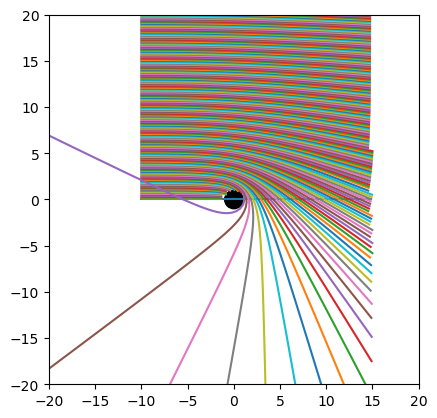

In [28]:
figure, axes = plt.subplots() 
# for i, result in enumerate(result_list_to_plot_2):
    
#     k_x_0, x0, k_y_0, y0, k_z_0, z0 = list_values_0[i]
    
cc = plt.Circle(( 0,0 ), 1.0, color="k" ) 

axes.set_aspect( 1 ) 
axes.add_artist( cc ) 

cc = plt.Circle(( 0,0 ), 1.0, color="k" ) 

for i in range(len(res_1d)):
    k_x, x, k_y, y, k_z, z = res_1d[i]['result'].y
    plt.plot(x, y)#, z)

axes.set_xlim(-20, 20)
axes.set_ylim(-20, 20)

Text(0.5, 0, '$z$')

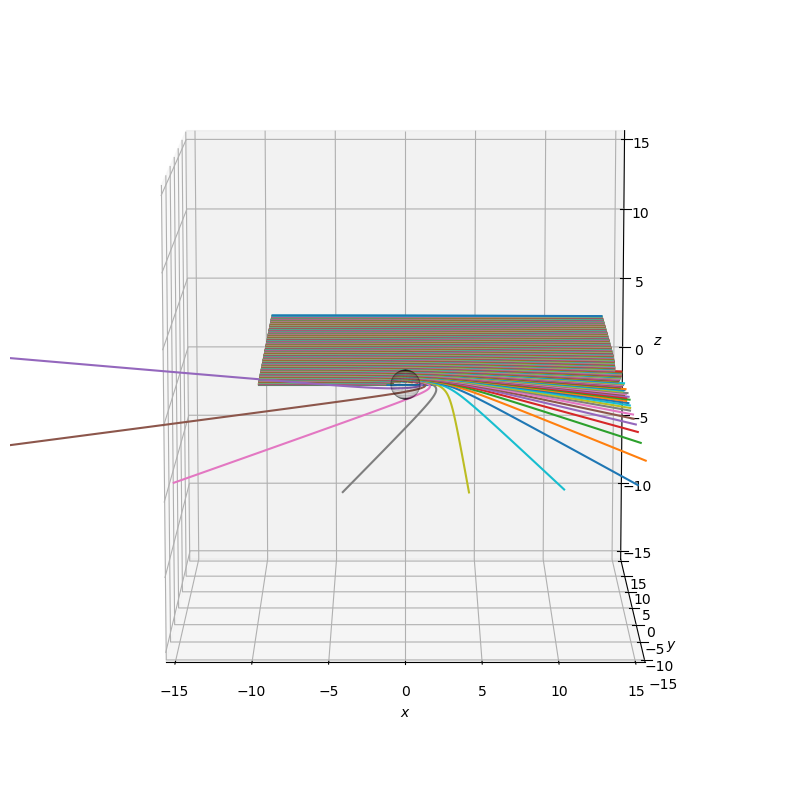

In [22]:
plt.close()
#frames = len(result_list[0].y[0])
#print(frames)

# We add a subplot to the figure which we tell to use the 3d projection 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
# We set the scaling of the axis to equal
ax.set_aspect("equal") 
# Lastly we set the viewing angle from which we want to view our 3d scene.
ax.view_init(elev=10, azim=-90, roll=0)


# Using numpy we make a grid that we use to plot the wireframe
theta_w, phi_w =  np.mgrid[0:2*np.pi : 60j ,0:np.pi : 60j]

# We set the radius of the wireframe sphere to 1 and calculate
# the cartesian coordinates
# r_w = 1
x_w = np.sin(theta_w) * np.cos(phi_w) #func_x(r_w, theta_w, phi_w)
y_w = np.sin(theta_w) * np.sin(phi_w) #func_y(r_w, theta_w, phi_w)
z_w = np.cos(theta_w) #func_z(r_w, theta_w, phi_w)

ax.plot_wireframe(x_w,y_w,z_w, colors= [0,0,0,0.08], linewidths=[0.5])

# # We plot the wireframe
for i in range(len(res_1d)):
    k_x, x, k_y, y, k_z, z = res_1d[i]['result'].y
    plt.plot(x, y, z)
    

limit = 15
plt.xlim(-limit, limit)
plt.ylim(-limit, limit)
ax.set_zlim(-limit, limit)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')




In [238]:
res2 = SW.calc_trajectory()
len(res2.t_events[1])>0, res2["hit_background"]

New:  A termination event occurred. 0.003645181655883789 sec


(True, True)

In [289]:
results_grid = SW.calc_grid(y0_start = -30.1, y0_end = 30.1, z0_start = -30.1, z0_end = 30.1, \
                              y_spacing = 0.1, z_spacing = 0.1)

Expected compute:  1087.212 sec, for  362404  models
x0:  -10
y0 range:  -30.1 30.000000000000853
z0 range:  -30.1 30.000000000000853
1015.7388648986816


In [235]:
big_grid = results_grid

In [253]:
results_grid[0][0]

{'x0': -10,
 'y0': -30.1,
 'z0': 0.0,
 'result':  hit_background: True
   hit_blackhole: False
     hit_nothing: False
         message: 'A termination event occurred.'
            nfev: 26
            njev: 0
             nlu: 0
             sol: None
          status: 1
         success: True
               t: array([ 0.        ,  0.50505051,  1.01010101,  1.51515152,  2.02020202,
         2.52525253,  3.03030303,  3.53535354,  4.04040404,  4.54545455,
         5.05050505,  5.55555556,  6.06060606,  6.56565657,  7.07070707,
         7.57575758,  8.08080808,  8.58585859,  9.09090909,  9.5959596 ,
        10.1010101 , 10.60606061, 11.11111111, 11.61616162, 12.12121212,
        12.62626263, 13.13131313, 13.63636364, 14.14141414, 14.64646465,
        15.15151515, 15.65656566, 16.16161616, 16.66666667, 17.17171717,
        17.67676768, 18.18181818, 18.68686869, 19.19191919, 19.6969697 ,
        20.2020202 , 20.70707071, 21.21212121, 21.71717172, 22.22222222,
        22.72727273, 23.232323

In [256]:
0%2

0

In [282]:
round(2.6, 0), int(2.6)

(3.0, 2)

In [339]:

def plot_BH(translate = 0, save_name = "bh.jpg"):
    
    def background_function_odd_even(y, z, scale = 3):
        if (round(y/scale, 0)%2 == 0):
            if (round(z/scale, 0)%2 == 0):
                return 1 #image[iy][iz] = 1
        else:
            if (round(z/scale, 0)%2 != 0):
                return 1 #image[iy][iz] = 0
        return 0.5


    nr_y, nr_z = len(results_grid), len(results_grid[0])
    #print(nr_y, nr_z)
    image = [[0 for i in range(nr_z)] for i in range(nr_y)] #np.zeros((nr_y, nr_z))

    for iy in range(len(results_grid)):
        for iz in range(len(results_grid[iy])):
            if results_grid[iy][iz]['result']["hit_background"]:
                k_x, x, k_y, y, k_z, z  = results_grid[iy][iz]['result'].y
                y_end, z_end = y[-1], z[-1]+translate
                if (y_end < 2 and z_end < 2) and (y_end > -2 and z_end > -2):
                    image[iy][iz] = 0.5
                else:
                    image[iy][iz] = 1.5
                #image[iy][iz] = background_function_odd_even(y_end, z_end)

            else:
                if results_grid[iy][iz]['result']["hit_blackhole"]:
                    image[iy][iz] = 0
                else:
                    image[iy][iz] = 0


    fig, ax = plt.subplots()
    i = ax.imshow(image, interpolation='nearest')#, interpolation='none')
    #i = ax.imshow(X, cmap=cm.jet, interpolation='nearest')
    #fig.colorbar(i)
    # plt.xlim(200,400)
    # plt.ylim(200,400)
    plt.xlim(100,500)
    plt.ylim(100,500)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.savefig(save_name)
    plt.close()

plot_BH(translate = 5)
    
for step in np.arange(0, 50, 0.5):
    print(step)
    plot_BH(translate = step-25, save_name = "bh_animation_2/bh_"+str(step)+".jpg")


0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5
10.0
10.5
11.0
11.5
12.0
12.5
13.0
13.5
14.0
14.5
15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0
20.5
21.0
21.5
22.0
22.5
23.0
23.5
24.0
24.5
25.0
25.5
26.0
26.5
27.0
27.5
28.0
28.5
29.0
29.5
30.0
30.5
31.0
31.5
32.0
32.5
33.0
33.5
34.0
34.5
35.0
35.5
36.0
36.5
37.0
37.5
38.0
38.5
39.0
39.5
40.0
40.5
41.0
41.5
42.0
42.5
43.0
43.5
44.0
44.5
45.0
45.5
46.0
46.5
47.0
47.5
48.0
48.5
49.0
49.5


In [150]:
for iy in range(len(results_grid)):
    for iz in range(len(results_grid[iy])):
        if len(results_grid[iy][iz]['result'].y_events[0]) > 0:
            print(results_grid[iy][iz]['result'].y_events[0][0][1])

-0.7415267022157759
0.27152297484979954
-0.7415267022157759
-0.45326866585704356
0.776980168786585
0.27152297484979954
0.776980168786582


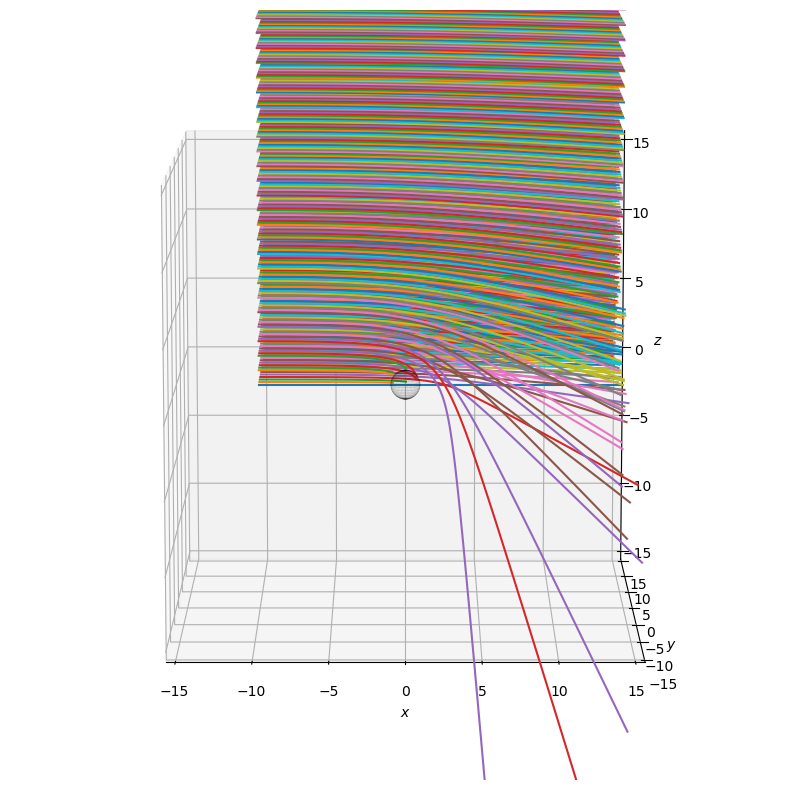

In [207]:
plt.close()
#frames = len(result_list[0].y[0])
#print(frames)

# We add a subplot to the figure which we tell to use the 3d projection 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
# We set the scaling of the axis to equal
ax.set_aspect("equal") 
# Lastly we set the viewing angle from which we want to view our 3d scene.
ax.view_init(elev=10, azim=-90, roll=0)

# Using numpy we make a grid that we use to plot the wireframe
theta_w, phi_w =  np.mgrid[0:2*np.pi : 60j ,0:np.pi : 60j]

# We set the radius of the wireframe sphere to 1 and calculate
# the cartesian coordinates
# r_w = 1
x_w = np.sin(theta_w) * np.cos(phi_w) #func_x(r_w, theta_w, phi_w)
y_w = np.sin(theta_w) * np.sin(phi_w) #func_y(r_w, theta_w, phi_w)
z_w = np.cos(theta_w) #func_z(r_w, theta_w, phi_w)

# # We plot the wireframe
ax.plot_wireframe(x_w,y_w,z_w, colors= [0,0,0,0.08], linewidths=[0.5])

limit = 15
plt.xlim(-limit, limit)
plt.ylim(-limit, limit)
ax.set_zlim(-limit, limit)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

for iy in range(len(results_grid)):
    for iz in range(len(results_grid[iy])):
        #print((iy, iz), (results_grid[iz][iy]['y0']), results_grid[iz][iy]['z0'])
        x0, y0, z0 = results_grid[iy][iz]['x0'], results_grid[iy][iz]['y0'], results_grid[iy][iz]['z0']
        #ax.plot(x0, y0, z0, "k.")
        
        if (y0**2 + z0**2 >= 0) and (y0**2 + z0**2 <= 100**2):
            k_x, x, k_y, y, k_z, z = results_grid[iz][iy]['result'].y
            plt.plot(x, y, z)
        #if len(results_grid[iz][iy]['result']
        
#ax.plot

In [47]:
grid_x0 = np.array([-10])
grid_y0 = np.arange(0, 10.1, 0.5)
grid_z0 = np.arange(0, 10.1, 0.5)

print("Expected compute: ", len(grid_x0)*len(grid_y0)*len(grid_z0)*2.5 / 60, "min, for ", \
      len(grid_x0)*len(grid_y0)*len(grid_z0), " models")
print("x0 range: ", min(grid_x0), max(grid_x0))
print("y0 range: ", min(grid_y0), max(grid_y0))
print("z0 range: ", min(grid_z0), max(grid_z0))

Expected compute:  18.375 min, for  441  models
x0 range:  -10 -10
y0 range:  0.0 10.0
z0 range:  0.0 10.0


In [17]:
grid_x0 = np.array([-10])
grid_y0 = np.arange(0, 10.1, 0.5)
grid_z0 = np.arange(0, 10.1, 0.5)

newlist = [[{"x": x0, "y": y, "z": z, "result":...} for y in grid_y0] for z in grid_z0]
newlist

[[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1,

In [ ]:
       
#     def calc_trajectory_old(self, \
#                         k_x_0 = 1., k_y_0 = 0., k_z_0 = 0., \
#                         x0 = -10.0, y0 = 5.0, z0 = 5.0, \
#                         curve_start = 0, \
#                         curve_end = 50, \
#                         nr_points_curve = 50, \
#                        ):
#         # Step function needed for solve_ivp
#         def step(lamb, new):
#             new_k_x, new_x, new_k_y, new_y, new_k_z, new_z = new

#             list_of_subs = [(self.r_s, self.r_s_value), \
#                             (self.k_x, new_k_x), (self.k_y, new_k_y), (self.k_z, new_k_z), \
#                            (self.x, new_x), (self.y, new_y), (self.z, new_z)]

#             new_k_t = self.k_t_from_norm.subs(list_of_subs)
# #             new_k_t = self.k_t_from_norm_lamb(self.x, self.y, self.z, \
# #                                               self.k_x, self.k_y, self.k_z, 
# #                                               self.r_s_value)
#             #print(new_k_t)

#             list_of_subs += [(self.k_t, new_k_t)]

#             new_dk_x = float( self.dk_x.subs(list_of_subs) )
#             dx = new_k_x

#             #print(new_dk_r, dr, new_k_r, new_r)

#             new_dk_y = float( self.dk_y.subs(list_of_subs) )
#             dy = new_k_y

#             new_dk_z = float( self.dk_z.subs(list_of_subs) )
#             dz = new_k_z

#             return( new_dk_x, dx, new_dk_y, dy, new_dk_z, dz)

#         #curve_start, curve_end, nr_points_curve = 0, 50, 50
        

#         #self.k_t_from_norm_lamb(x0, y0, z0, k_x_0, k_y_0, k_z_0, 1)


#         values_0 = [ k_x_0, x0, k_y_0, y0, k_z_0, z0 ]#[k3_0[0], x3_0[0], k3_0[1], x3_0[1], k3_0[2], x3_0[2]]
#         #list_values_0.append(values_0)

#         t_pts = np.linspace(curve_start, curve_end, nr_points_curve)

#         start = time.time()
#         result = solve_ivp(step, (curve_start, curve_end), values_0, t_eval=t_pts)
#         end = time.time()
#         print("New: ", result.message, end-start, "sec")

#         #comp_times.append(end - start)

#         return result